In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os

In [3]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_json('ML-NLP/Recommendation System/tops_fashion.json')
print ('Number of data points : ', data.shape[0],'\nNumber of features/variables:', data.shape[1])

Number of data points :  183138 
Number of features/variables: 19


In [5]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [6]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [7]:
print ('Number of data points : ', data.shape[0],'\nNumber of features:', data.shape[1])
data.head()

Number of data points :  183138 
Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [8]:
# Basic stats for the feature: product_type_name
print(data['product_type_name'].describe())
print("\n",data['product_type_name'].unique())
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object

 ['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CR

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [9]:
#Basic stats for the feature: brand
print(data['brand'].describe())
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [10]:
#Basic stats for the feature: color
print(data['color'].describe())
color_count = Counter(list(data['color']))
color_count.most_common(10)

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [11]:
#Basic stats for the feature: formatted_price
print(data['formatted_price'].describe())
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [12]:
#Basic stats for the feature: title
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [13]:
data.to_pickle('ML-NLP/Recommendation System/pickels/180k_apparel_data')
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

Number of data points After eliminating price=NULL : 28395


In [14]:
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])

Number of data points After eliminating color=NULL : 28385


In [15]:
#Remove near duplicate items
data = pd.read_pickle('ML-NLP/Recommendation System/pickels/28k_apparel_data')

# find number of products that have duplicate titles.
print(sum(data.duplicated('title')))

2325


In [16]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [17]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 27949


In [18]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [19]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [20]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [21]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [22]:
print('Number of data points : ', data.shape[0])

Number of data points :  17593


In [23]:
data.to_pickle('ML-NLP/Recommendation System/pickels/17k_apperal_data')
# Storing these products in a pickle file

In [24]:
#Text preprocessing
data = pd.read_pickle('ML-NLP/Recommendation System/pickels/17k_apperal_data')
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string
        
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

list of stop words: {"won't", 'with', "wasn't", 'and', "you've", 'some', 'me', 'being', 'wouldn', 'our', 'this', 'was', 's', 'won', 'you', "didn't", 'own', 'there', 'how', 'himself', 'has', 'its', 'doesn', 'him', 'below', 'off', 'no', 'm', 'until', 'all', 'haven', 'do', 'during', 'o', "that'll", 'under', 'because', 'in', 'can', 'my', 'ourselves', "mightn't", 'or', 'ma', "you'll", 'needn', 'into', 'here', "hasn't", "isn't", 'now', 'mightn', "shouldn't", 'd', 'is', 'once', 'same', 'through', 'where', 'am', 'yours', 'of', 'ours', 'your', 'whom', 'be', 'shouldn', 'aren', 'an', 'ain', 'down', "aren't", 'just', 'when', "you're", 'between', 'which', 'myself', 'hers', 'will', 'herself', 'too', 'been', 'themselves', 'against', 'up', 'weren', 'then', 'not', 'out', 'the', 'don', 'were', "needn't", 'she', "she's", 'those', 'having', "don't", 'for', 'each', 'both', 'her', "mustn't", 'we', 'by', 'before', 've', 'their', "wouldn't", 'more', 'from', 'why', 'yourselves', 'it', 'at', 'does', 'very', 'if

In [25]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


In [26]:
data.to_pickle('ML-NLP/Recommendation System/pickels/17k_apperal_data_preprocessed')

In [27]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))

argu
fish


In [28]:
#Text based product similarity
data = pd.read_pickle('ML-NLP/Recommendation System/pickels/17k_apperal_data_preprocessed')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


In [29]:
#Display an image
def display_img(url,ax,fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        ax = plt.subplot(gs[0])
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys)
        ax.set_title(text)
        ax = plt.subplot(gs[1])
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        display_img(url, ax, fig)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    intersection = set(vec1.keys()) & set(vec2.keys()) 
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
            
    keys = list(vec2.keys())  
    values = [vec2[x] for x in vec2.keys()]

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plot_heatmap(keys, values, labels, url, text)

def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words) 

def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [30]:
#Bag of Words on Product titles
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(17593, 12927)

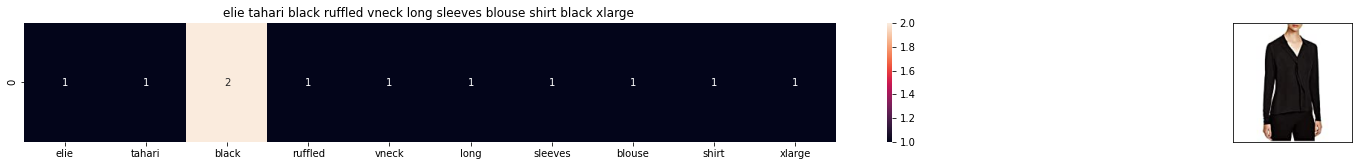

ASIN : B0728DT431
Brand: Elie Tahari
Title: elie tahari black ruffled vneck long sleeves blouse shirt black xlarge 
Euclidean similarity with the query image : 0.0


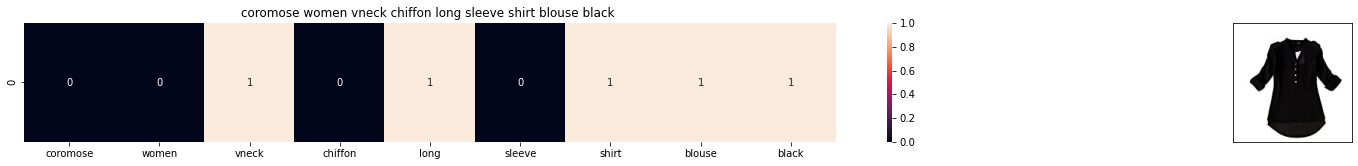

ASIN : B00NNFP22K
Brand: coromose
Title: coromose women vneck chiffon long sleeve shirt blouse black 
Euclidean similarity with the query image : 3.1622776601683795


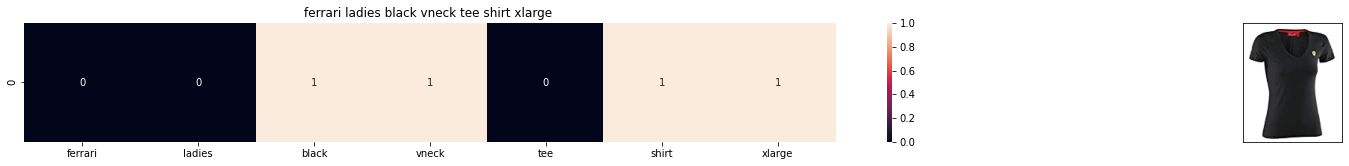

ASIN : B01EZ6XKR4
Brand: Ferrari
Title: ferrari ladies black vneck tee shirt xlarge 
Euclidean similarity with the query image : 3.1622776601683795


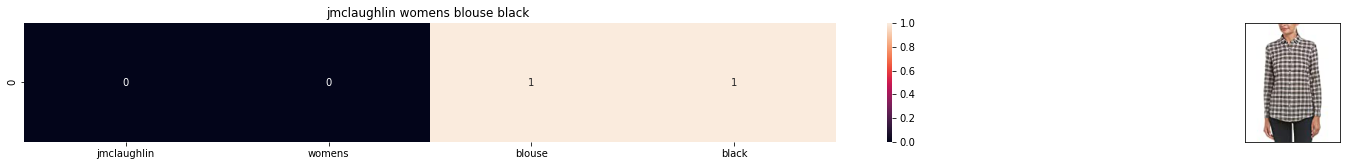

ASIN : B074KN55WS
Brand: J. McLaughlin
Title: jmclaughlin womens blouse black 
Euclidean similarity with the query image : 3.3166247903554


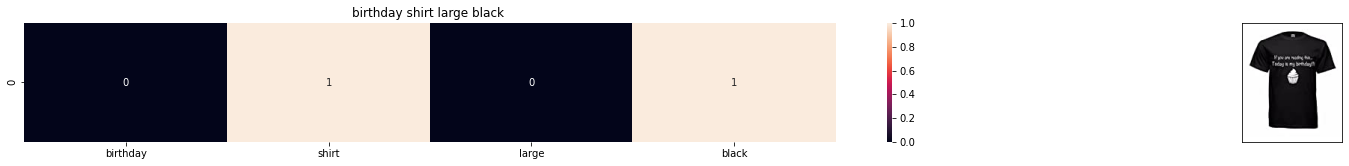

ASIN : B06XQ5V17Z
Brand: Speak Your Piece
Title: birthday shirt large black 
Euclidean similarity with the query image : 3.3166247903554


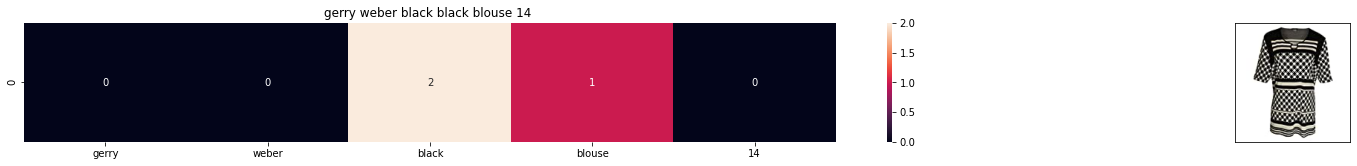

ASIN : B00O492QMI
Brand: Gerry Webber
Title: gerry weber black black blouse 14 
Euclidean similarity with the query image : 3.3166247903554


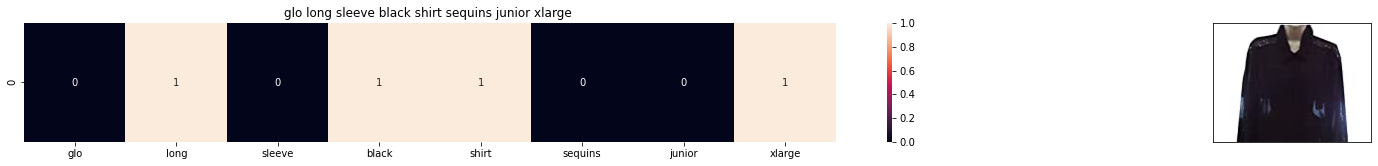

ASIN : B01NBLNC7J
Brand: Glo
Title: glo long sleeve black shirt sequins junior xlarge 
Euclidean similarity with the query image : 3.3166247903554


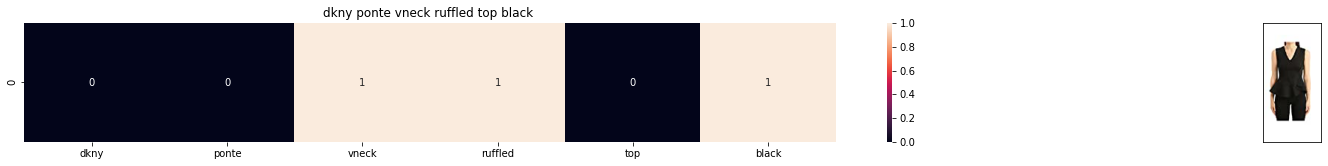

ASIN : B06XH7HQ2T
Brand: DKNY
Title: dkny ponte vneck ruffled top black 
Euclidean similarity with the query image : 3.3166247903554


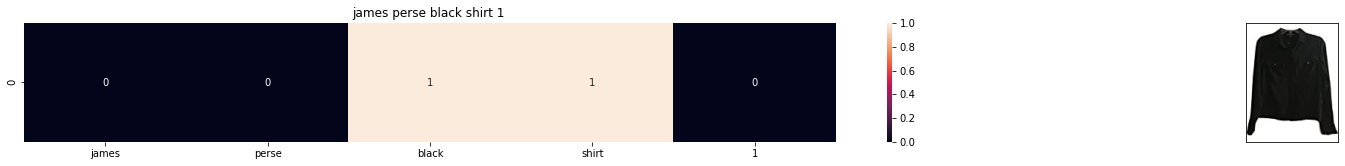

ASIN : B01N8Z2K60
Brand: James Perse
Title: james perse black shirt 1 
Euclidean similarity with the query image : 3.3166247903554


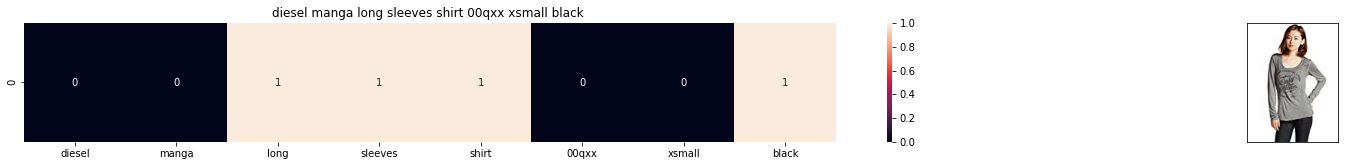

ASIN : B00N2FKJR4
Brand: DIESEL
Title: diesel manga long sleeves shirt 00qxx xsmall black 
Euclidean similarity with the query image : 3.3166247903554


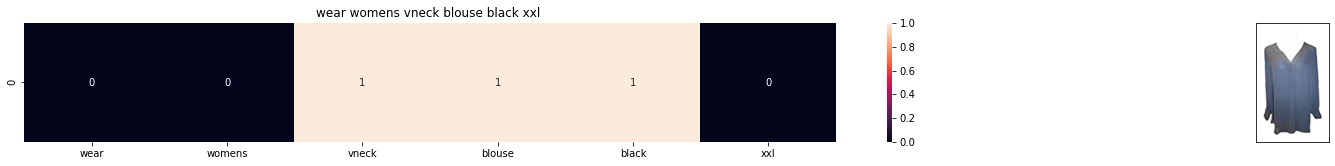

ASIN : B06Y6FH453
Brand: Who What Wear
Title: wear womens vneck blouse black xxl 
Euclidean similarity with the query image : 3.3166247903554


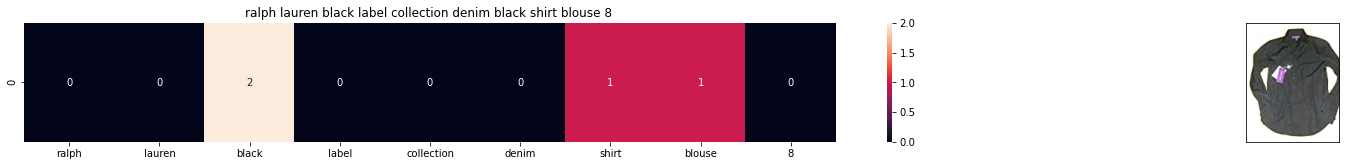

ASIN : B01EUK0EDS
Brand: Ralph Lauren Black Label
Title: ralph lauren black label collection denim black shirt blouse 8 
Euclidean similarity with the query image : 3.4641016151377544


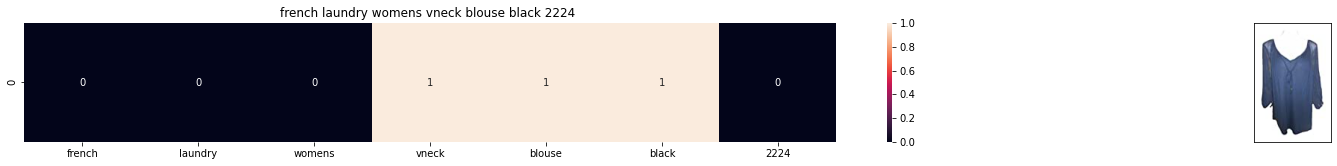

ASIN : B071Y37JDS
Brand: French Laundry
Title: french laundry womens vneck blouse black 2224 
Euclidean similarity with the query image : 3.4641016151377544


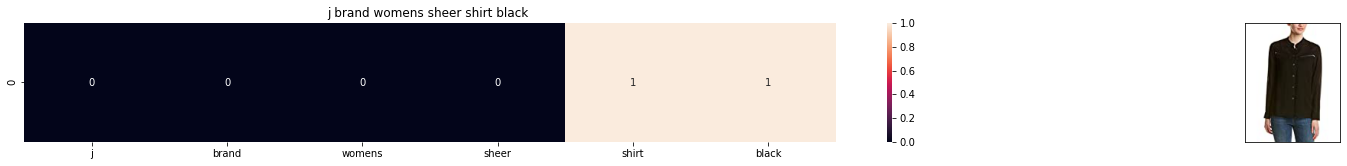

ASIN : B013L1V8PK
Brand: J Brand Jeans
Title: j brand womens sheer shirt black 
Euclidean similarity with the query image : 3.4641016151377544


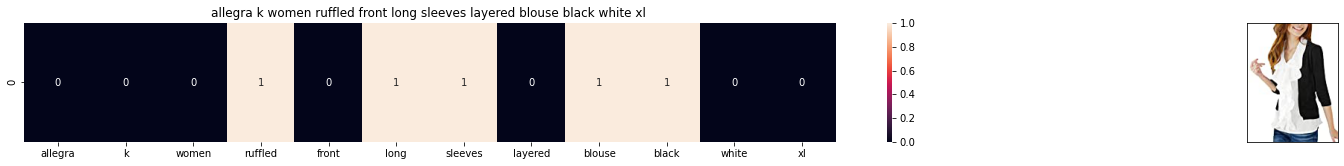

ASIN : B00E1LCYZI
Brand: Allegra K
Title: allegra k women ruffled front long sleeves layered blouse black white xl 
Euclidean similarity with the query image : 3.4641016151377544


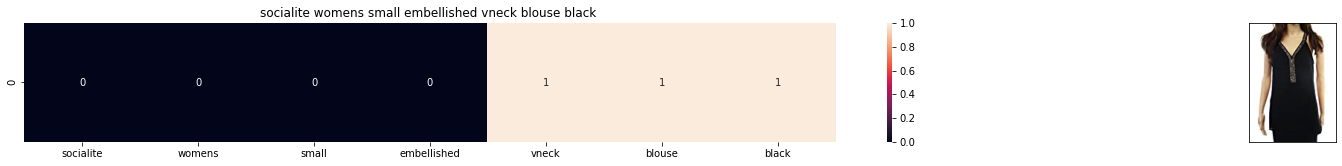

ASIN : B01K11JE9A
Brand: Socialite
Title: socialite womens small embellished vneck blouse black 
Euclidean similarity with the query image : 3.4641016151377544


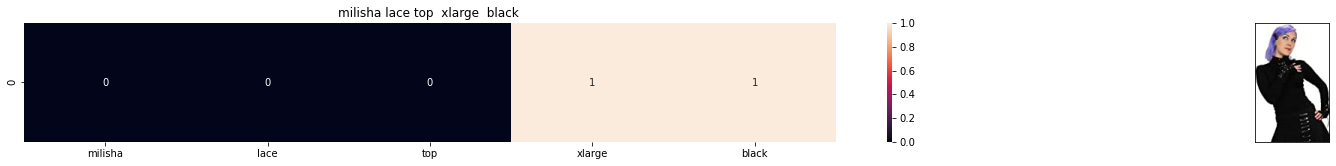

ASIN : B005AFD9WQ
Brand: Milisha
Title: milisha lace top  xlarge  black 
Euclidean similarity with the query image : 3.4641016151377544


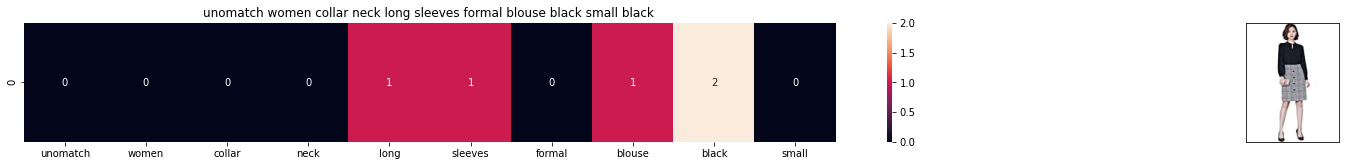

ASIN : B01N9N5VSP
Brand: Unomatch
Title: unomatch women collar neck long sleeves formal blouse black small black 
Euclidean similarity with the query image : 3.4641016151377544


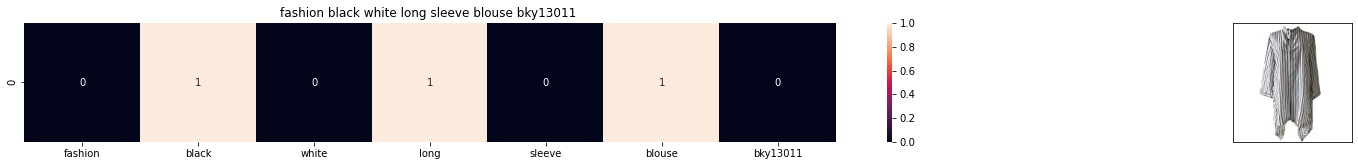

ASIN : B01FO7EI0G
Brand: bankhunyabangyai store
Title: fashion black white long sleeve blouse bky13011 
Euclidean similarity with the query image : 3.4641016151377544


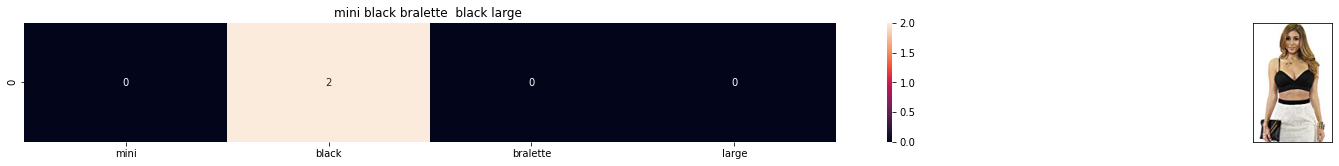

ASIN : B01HT0QG42
Brand: Lushfox
Title: mini black bralette  black large 
Euclidean similarity with the query image : 3.4641016151377544


In [31]:
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12566, 20) # change the index if you want to.

In [32]:
#TF-IDF based product similarity
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

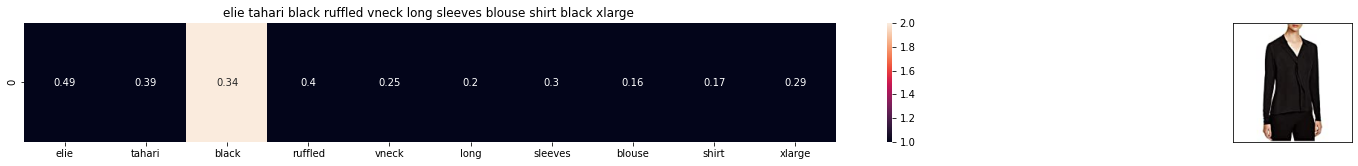

ASIN : B0728DT431
BRAND : Elie Tahari
Eucliden distance from the given image : 0.0


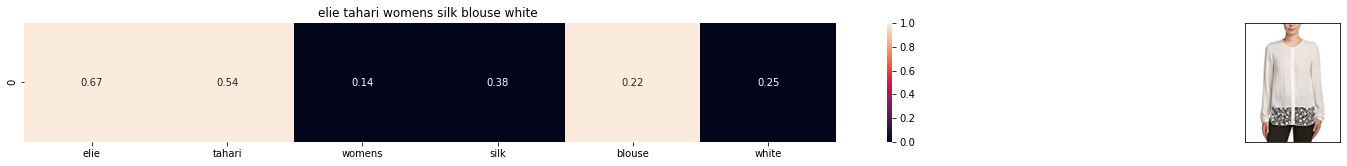

ASIN : B0758ZBV4G
BRAND : Elie Tahari
Eucliden distance from the given image : 0.930818338718771


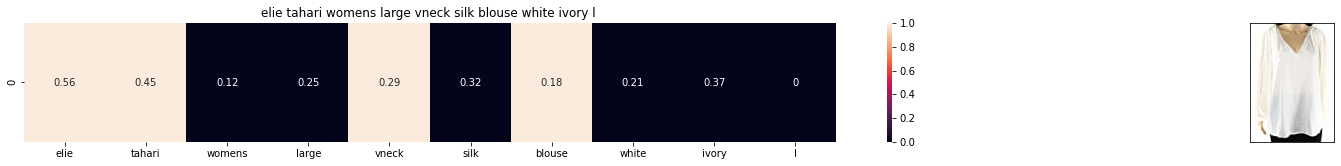

ASIN : B0758L371D
BRAND : Elie Tahari
Eucliden distance from the given image : 0.946967152190245


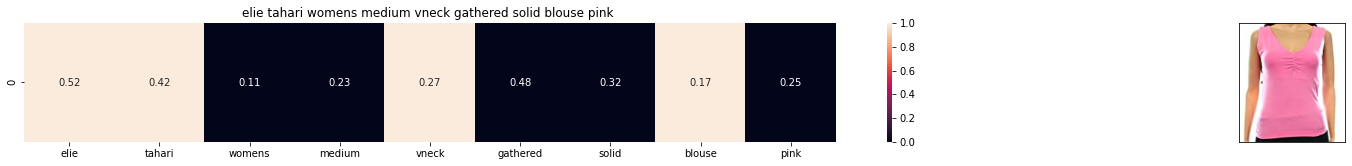

ASIN : B072VH8MKT
BRAND : Elie Tahari
Eucliden distance from the given image : 0.9917066516089336


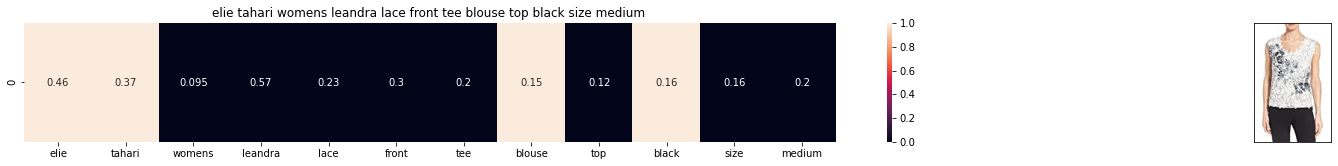

ASIN : B072HMB95W
BRAND : Elie Tahari
Eucliden distance from the given image : 1.0506076854072617


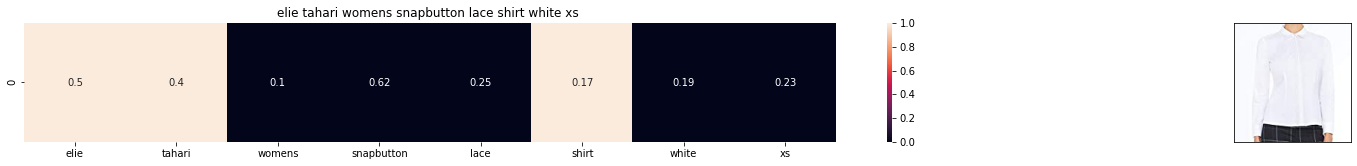

ASIN : B06X8YS632
BRAND : Elie Tahari
Eucliden distance from the given image : 1.066566411352814


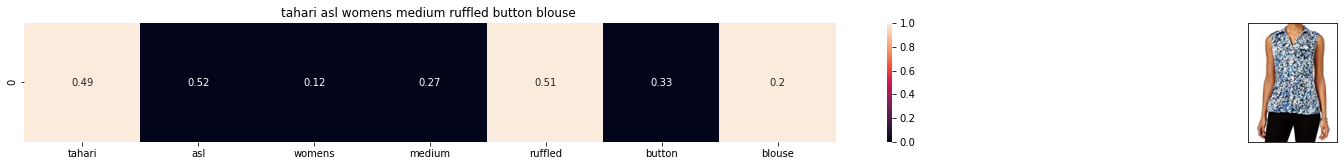

ASIN : B0727R3ZK8
BRAND : Tahari ASL
Eucliden distance from the given image : 1.0709334130469317


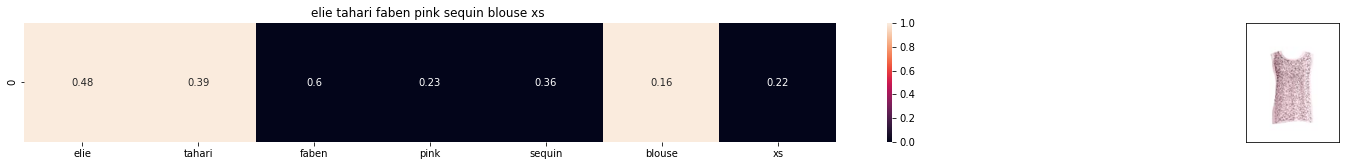

ASIN : B074VCVG5V
BRAND : Elie Tahari
Eucliden distance from the given image : 1.08545446199004


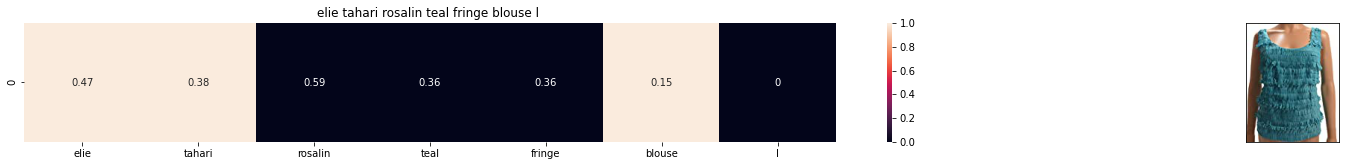

ASIN : B0751J7MJ5
BRAND : Elie Tahari
Eucliden distance from the given image : 1.092029162906729


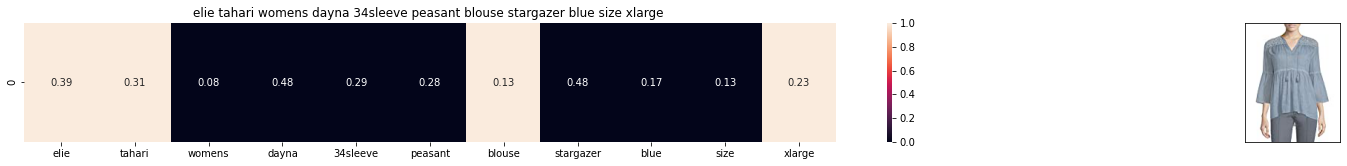

ASIN : B07258KQPD
BRAND : Elie Tahari
Eucliden distance from the given image : 1.0977009126384472


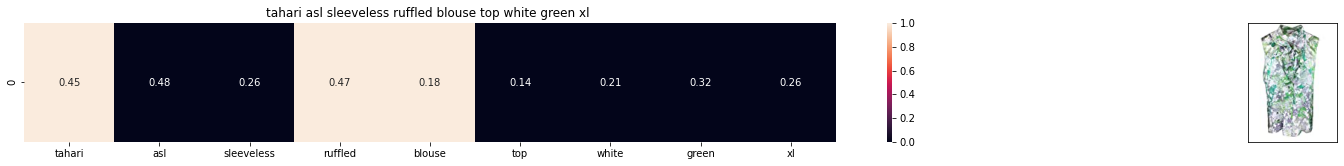

ASIN : B07196K8ZK
BRAND : Tahari ASL
Eucliden distance from the given image : 1.0978263376268496


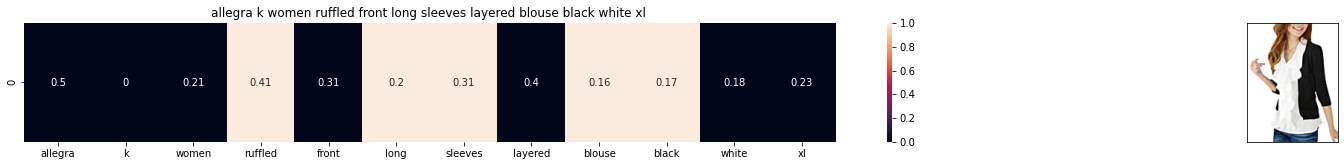

ASIN : B00E1LCYZI
BRAND : Allegra K
Eucliden distance from the given image : 1.1093679744838518


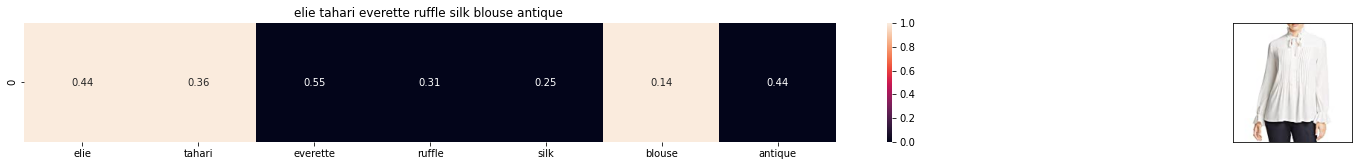

ASIN : B06XQS7B2H
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1158494288000618


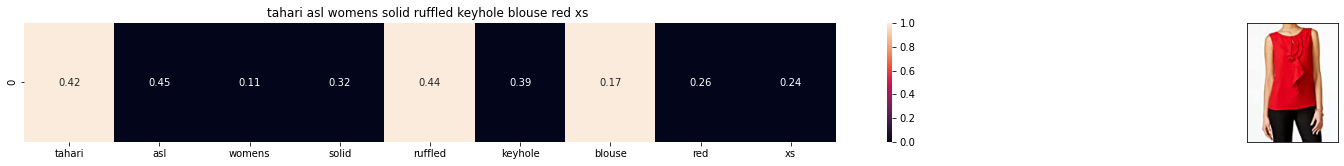

ASIN : B073DRMT4F
BRAND : Tahari ASL
Eucliden distance from the given image : 1.12308897039674


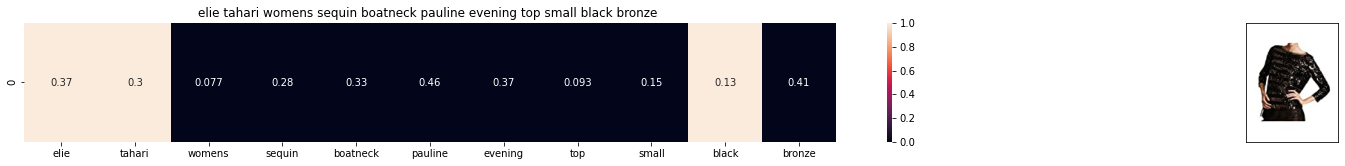

ASIN : B005E2L4XG
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1459082030786756


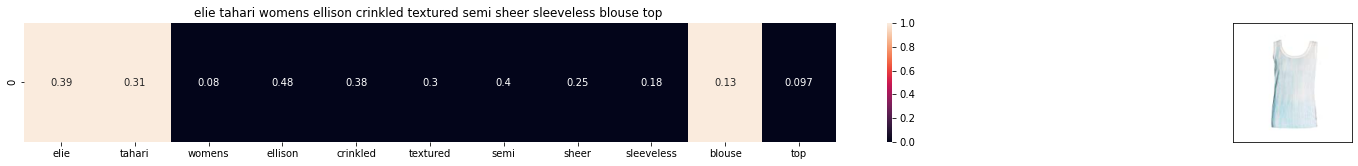

ASIN : B074VBLW5S
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1581769909433588


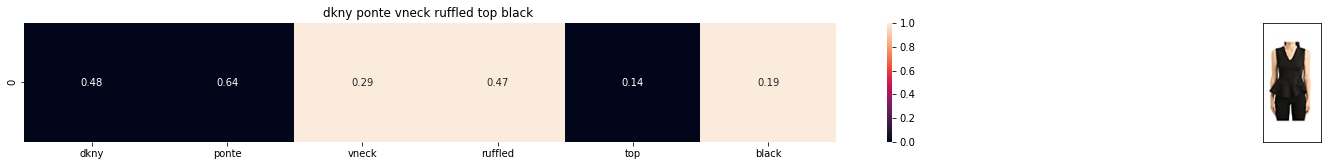

ASIN : B06XH7HQ2T
BRAND : DKNY
Eucliden distance from the given image : 1.1592903335734797


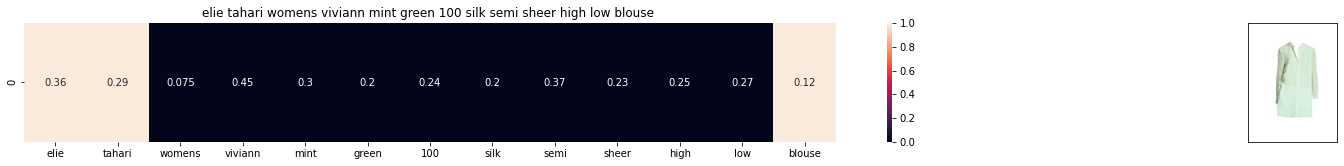

ASIN : B074VBRNX8
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1758332562415978


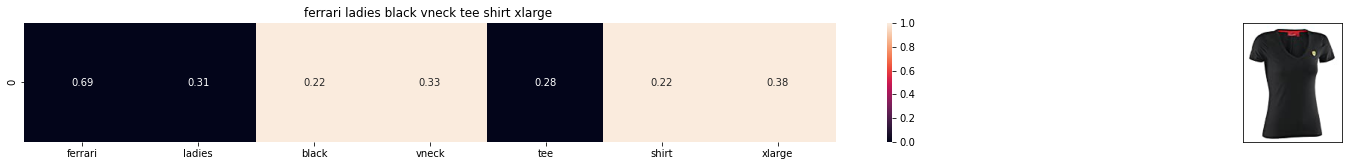

ASIN : B01EZ6XKR4
BRAND : Ferrari
Eucliden distance from the given image : 1.1773106599940453


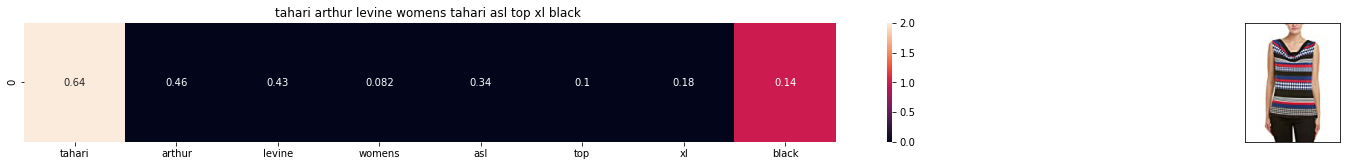

ASIN : B06X1BSY2V
BRAND : Tahari by Arthur S. Levine
Eucliden distance from the given image : 1.1849129271513121


In [33]:
def tfidf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12566, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title